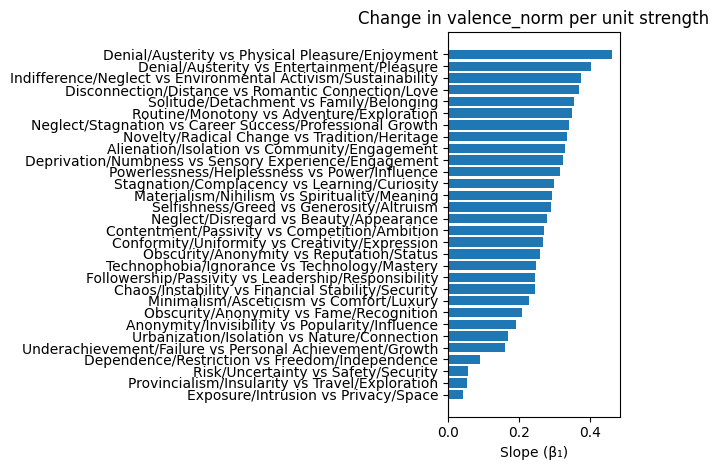

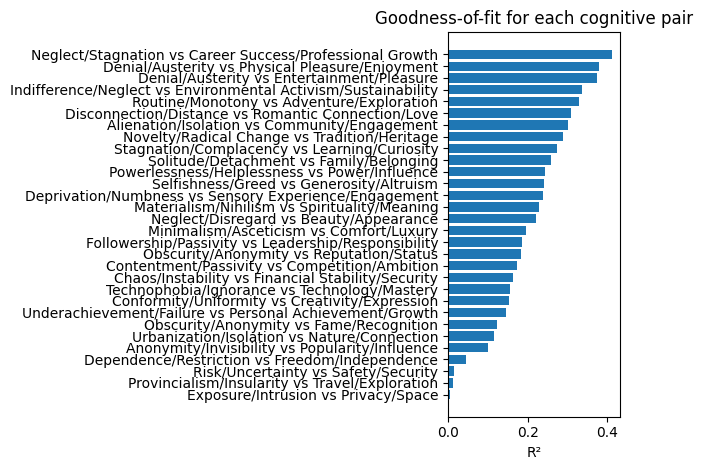

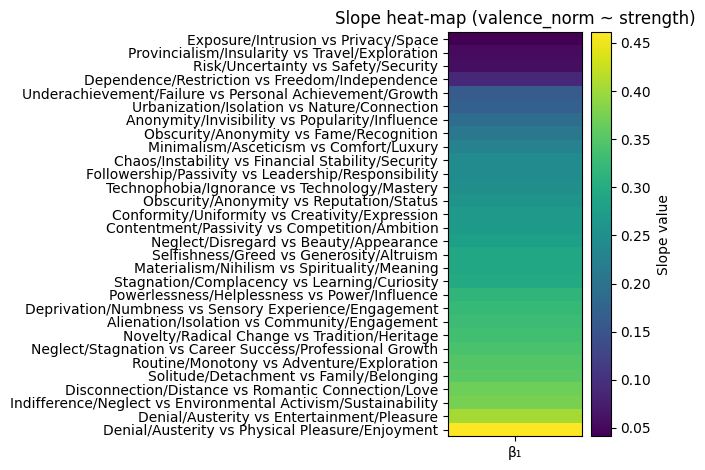

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# -----------------------------------------------------------------------------
# 0)  if you haven’t already: build  `df`  and  `summary`
# -----------------------------------------------------------------------------
PATH = r"/home/koalacrown/Desktop/Code/Projects/LLM_threapy/LLM_agumented_therapy/Cogexp/Valence/cognitive_experiment_results007_big_normalised.xlsx"
df = pd.read_excel(PATH)[["pair", "strength", "valence_norm"]].dropna()

summary = []
for pair, g in df.groupby("pair"):
    X = g["strength"].to_numpy().reshape(-1, 1)
    y = g["valence_norm"].to_numpy()
    reg = LinearRegression().fit(X, y)
    summary.append(
        {"pair": pair, "slope": reg.coef_[0], "intercept": reg.intercept_,
         "R2": reg.score(X, y), "n": len(g)}
    )
summary = pd.DataFrame(summary)

# -----------------------------------------------------------------------------
# 1)  Bar-chart of slopes β₁
# -----------------------------------------------------------------------------
plt.figure()
ordered = summary.sort_values("slope")
plt.barh(ordered["pair"], ordered["slope"])
plt.axvline(0)                       # visual zero-line
plt.xlabel("Slope (β₁)")
plt.title("Change in valence_norm per unit strength")
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# 2)  Bar-chart of R²
# -----------------------------------------------------------------------------
plt.figure()
ordered = summary.sort_values("R2")
plt.barh(ordered["pair"], ordered["R2"])
plt.xlabel("R²")
plt.title("Goodness-of-fit for each cognitive pair")
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# 3)  Scatter + fitted line (pick a pair to inspect)
# -----------------------------------------------------------------------------
def plot_pair(pair_name):
    g = df[df["pair"] == pair_name]
    X = g["strength"].to_numpy().reshape(-1, 1)
    y = g["valence_norm"].to_numpy()
    reg = LinearRegression().fit(X, y)
    y_hat = reg.predict(X)

    plt.figure()
    plt.scatter(g["strength"], g["valence_norm"], label="data")
    plt.plot(g["strength"], y_hat, label=f"β₀={reg.intercept_:.2f}, β₁={reg.coef_[0]:.2f}")
    plt.title(pair_name)
    plt.xlabel("Strength")
    plt.ylabel("Valence (normalised)")
    plt.legend()
    plt.tight_layout()
    plt.show()

# example:
# plot_pair("Alienation/Isolation vs Community/Engagement")

# -----------------------------------------------------------------------------
# 4)  Heat-map of slopes (compact overview)
# -----------------------------------------------------------------------------
vals = summary.sort_values("slope")["slope"].to_numpy().reshape(-1, 1)

plt.figure()
plt.imshow(vals, aspect="auto")
plt.yticks(ticks=range(len(summary)),
           labels=summary.sort_values("slope")["pair"])
plt.gca().set_xticks([0])
plt.gca().set_xticklabels(["β₁"])
plt.colorbar(label="Slope value")
plt.title("Slope heat-map (valence_norm ~ strength)")
plt.tight_layout()
plt.show()


interactive(children=(Dropdown(description='Pair:', options=('Alienation/Isolation vs Community/Engagement', '…

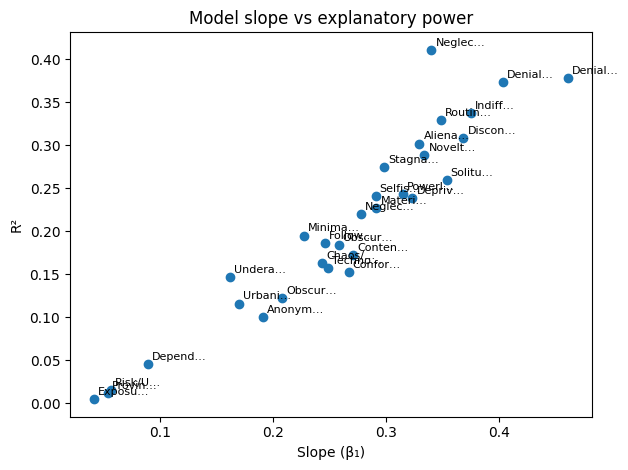

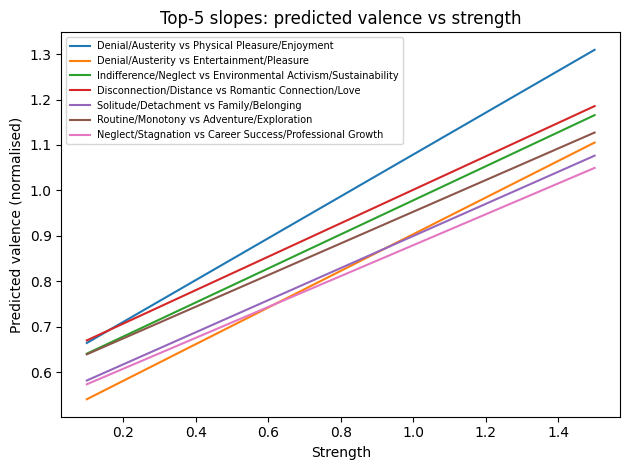

In [ ]:
# ---------------------------------------------------------------------------
# Advanced / prettier visualisations – drop this in the next cell and run
# ---------------------------------------------------------------------------
#
#  • Interactive scatter‑plus‑fit for any cognitive pair (use the dropdown)
#  • Scatter of slope vs R² (quick ‘signal‑vs‑fitʼ overview)
#  • Multi‑line comparison: predicted valence vs strength for the 5 steepest slopes
#
# All charts use matplotlib (no seaborn) and each has its own figure.
# No colours are manually specified (platform guideline compliance).
#
# ---------------------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# ---------------------------------------------------------------------------
# 0)  Re‑create the data objects only if they don't exist
# ---------------------------------------------------------------------------
PATH = r"/home/koalacrown/Desktop/Code/Projects/LLM_threapy/LLM_agumented_therapy/Cogexp/Valence/cognitive_experiment_results007_big_normalised.xlsx"

if "df" not in globals():
    df = pd.read_excel(PATH)[["pair", "strength", "valence_norm"]].dropna()

if "summary" not in globals():
    rows = []
    for pair, g in df.groupby("pair"):
        X = g["strength"].to_numpy().reshape(-1, 1)
        y = g["valence_norm"].to_numpy()
        reg = LinearRegression().fit(X, y)
        rows.append(
            {"pair": pair,
             "slope": reg.coef_[0],
             "intercept": reg.intercept_,
             "R2": reg.score(X, y),
             "n": len(g)}
        )
    summary = pd.DataFrame(rows)

# ---------------------------------------------------------------------------
# 1)  Interactive scatter + regression line for any pair
# ---------------------------------------------------------------------------
try:
    from ipywidgets import interact, Dropdown
except ImportError:
    print("ipywidgets is not available in this environment – the interactive "
          "widget will be skipped. You can `pip install ipywidgets` in a local "
          "Jupyter setup to enable it.")
    interact = None

def scatter_with_fit(pair_name):
    g = df[df["pair"] == pair_name]
    X = g["strength"].to_numpy().reshape(-1, 1)
    y = g["valence_norm"].to_numpy()
    reg = LinearRegression().fit(X, y)
    y_hat = reg.predict(X)

    plt.figure()
    plt.scatter(g["strength"], g["valence_norm"], label="data")
    plt.plot(g["strength"], y_hat, label=f"β₀={reg.intercept_:.2f}, β₁={reg.coef_[0]:.2f}")
    plt.xlabel("Strength")
    plt.ylabel("Valence (normalised)")
    plt.title(pair_name)
    plt.legend()
    plt.tight_layout()
    plt.show()

if interact is not None:
    interact(scatter_with_fit, pair_name=Dropdown(options=sorted(df["pair"].unique()), description="Pair:"))

# ---------------------------------------------------------------------------
# 2)  Quick overview: slope vs R²
# ---------------------------------------------------------------------------
plt.figure()
plt.scatter(summary["slope"], summary["R2"])
for _, row in summary.iterrows():
    plt.annotate(row["pair"].split(" vs ")[0][:6] + "…",
                 xy=(row["slope"], row["R2"]),
                 xytext=(3, 3),
                 textcoords="offset points",
                 fontsize=8)
plt.xlabel("Slope (β₁)")
plt.ylabel("R²")
plt.title("Model slope vs explanatory power")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------------
# 3)  Multi‑line comparison: 5 steepest slopes
# ---------------------------------------------------------------------------
top5 = summary.nlargest(7, "slope")
x_range = np.linspace(df["strength"].min(), df["strength"].max(), 100)

plt.figure()
for _, row in top5.iterrows():
    y_pred = row["intercept"] + row["slope"] * x_range
    plt.plot(x_range, y_pred, label=row["pair"])
plt.xlabel("Strength")
plt.ylabel("Predicted valence (normalised)")
plt.title("Top‑5 slopes: predicted valence vs strength")
plt.legend(fontsize=7)
plt.tight_layout()
plt.show()


In [25]:
# ---------------------------------------------------------------------------
# Prettier, fully‑interactive Plotly visuals  (seaborn is not allowed here)
# ---------------------------------------------------------------------------
#
#  • Horizontal bar of slopes
#  • Horizontal bar of R²
#  • Scatter (slope vs R²) with hover labels
#  • Multi‑line prediction plot for top‑5 slopes
#  • Interactive “choose‑any‑pair” scatter‑with‑fit using Plotly dropdown
#
# Each figure is standalone and no explicit colours are set (platform rule).
# ---------------------------------------------------------------------------

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

# ---------------------------------------------------------------------------
# 0)  Build the DataFrames if they don’t exist
# ---------------------------------------------------------------------------
PATH = r"/home/koalacrown/Desktop/Code/Projects/LLM_threapy/LLM_agumented_therapy/Cogexp/Valence/cognitive_experiment_results007_big_normalised.xlsx"
if "df" not in globals():
    df = pd.read_excel(PATH)[["pair", "strength", "valence_norm"]].dropna()

if "summary" not in globals():
    rows = []
    for pair, g in df.groupby("pair"):
        X = g["strength"].to_numpy().reshape(-1, 1)
        y = g["valence_norm"].to_numpy()
        reg = LinearRegression().fit(X, y)
        rows.append(
            {"pair": pair,
             "slope": reg.coef_[0],
             "intercept": reg.intercept_,
             "R2": reg.score(X, y),
             "n": len(g)}
        )
    summary = pd.DataFrame(rows)

# ----------------------------------------------------------------------------
# 1)  Horizontal bar – slopes
# ----------------------------------------------------------------------------
fig_slopes = px.bar(
    summary.sort_values("slope"),
    x="slope",
    y="pair",
    orientation="h",
    title="Change in valence_norm per unit strength (β₁)"
)
fig_slopes.show()

# ----------------------------------------------------------------------------
# 2)  Horizontal bar – R²
# ----------------------------------------------------------------------------
fig_r2 = px.bar(
    summary.sort_values("R2"),
    x="R2",
    y="pair",
    orientation="h",
    title="Goodness‑of‑fit (R²) for each cognitive pair"
)
fig_r2.show()

# ----------------------------------------------------------------------------
# 3)  Scatter: slope vs R²
# ----------------------------------------------------------------------------
fig_scatter = px.scatter(
    summary, x="slope", y="R2", text="pair",
    title="Model slope vs explanatory power"
)
fig_scatter.update_traces(textposition='top center', textfont_size=8)
fig_scatter.show()

# ----------------------------------------------------------------------------
# 4)  Multi‑line: predicted valence for top‑5 slopes
# ----------------------------------------------------------------------------
top5 = summary.nlargest(9, "slope")
x_range = np.linspace(df["strength"].min(), df["strength"].max(), 100)

fig_lines = go.Figure()
for _, row in top5.iterrows():
    fig_lines.add_trace(
        go.Scatter(
            x=x_range,
            y=row["intercept"] + row["slope"] * x_range,
            mode="lines",
            name=row["pair"]
        )
    )
fig_lines.update_layout(
    title="Top‑9 slopes: predicted valence vs strength",
    xaxis_title="Strength",
    yaxis_title="Predicted valence (normalised)"
)
fig_lines.show()

# ----------------------------------------------------------------------------
# 5)  Interactive scatter‑with‑fit for any pair (dropdown)
# ----------------------------------------------------------------------------
pairs_sorted = sorted(df["pair"].unique())
first_pair = pairs_sorted[0]

def build_pair_fig(pair_name):
    g = df[df["pair"] == pair_name]
    X = g["strength"].to_numpy().reshape(-1, 1)
    y = g["valence_norm"].to_numpy()
    reg = LinearRegression().fit(X, y)
    y_hat = reg.predict(X)

    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=g["strength"], y=g["valence_norm"],
        mode="markers", name="data"
    ))
    fig.add_trace(go.Scatter(
        x=g["strength"], y=y_hat,
        mode="lines", name=f"fit β₀={reg.intercept_:.2f}, β₁={reg.coef_[0]:.2f}"
    ))
    fig.update_layout(
        title=pair_name,
        xaxis_title="Strength",
        yaxis_title="Valence (normalised)"
    )
    return fig

# create frames for each pair and add dropdown menu
fig_pairs = build_pair_fig(first_pair)
dropdown_buttons = [
    {
        "label": p,
        "method": "update",
        "args": [
            {"x": [df[df["pair"] == p]["strength"],
                   df[df["pair"] == p]["strength"]],
             "y": [df[df["pair"] == p]["valence_norm"],
                   LinearRegression().fit(
                       df[df["pair"] == p]["strength"].to_numpy().reshape(-1, 1),
                       df[df["pair"] == p]["valence_norm"].to_numpy()
                   ).predict(
                       df[df["pair"] == p]["strength"].to_numpy().reshape(-1, 1)
                   )]
             },
            {"title": p}
        ]
    } for p in pairs_sorted
]

fig_pairs.update_layout(
    updatemenus=[{
        "buttons": dropdown_buttons,
        "direction": "down",
        "showactive": True,
        "x": 1.05,
        "y": 1.05
    }]
)

fig_pairs.show()


In [6]:
# ---------------------------------------------------------------------------
# Open each Plotly figure in a standalone browser tab/window
# ---------------------------------------------------------------------------
#
# Put this cell right after the one that creates the five Plotly objects
# (fig_slopes, fig_r2, fig_scatter, fig_lines, fig_pairs).
#
# It uses plotly.offline.plot(..., auto_open=True) to write a temporary
# HTML file and immediately open it with your system’s default browser.
# ---------------------------------------------------------------------------

from plotly.offline import plot
import os

# Specify the directory where the files will be saved
output_dir = "/home/koalacrown/Desktop/Code/Projects/LLM_threapy/LLM_agumented_therapy/Cogexp/Valence/figures"

# Ensure the directory exists
os.makedirs(output_dir, exist_ok=True)

# List any figures you want to save
figures = {
    "slopes":   fig_slopes,
    "r2":       fig_r2,
    "slope_vs_r2": fig_scatter,
    "top5_lines":  fig_lines,
    "pair_dropdown": fig_pairs,
}

for name, fig in figures.items():
    # Define the file path
    file_path = os.path.join(output_dir, f"{name}.html")
    
    # Write the figure to the file and open it in the browser
    plot(fig, filename=file_path, auto_open=True, include_plotlyjs="cdn")
    
    # Print the path for reference
    print(f"{name} → {file_path}")

slopes → /home/koalacrown/Desktop/Code/Projects/LLM_threapy/LLM_agumented_therapy/Cogexp/Valence/figures/slopes.html
r2 → /home/koalacrown/Desktop/Code/Projects/LLM_threapy/LLM_agumented_therapy/Cogexp/Valence/figures/r2.html
slope_vs_r2 → /home/koalacrown/Desktop/Code/Projects/LLM_threapy/LLM_agumented_therapy/Cogexp/Valence/figures/slope_vs_r2.html
top5_lines → /home/koalacrown/Desktop/Code/Projects/LLM_threapy/LLM_agumented_therapy/Cogexp/Valence/figures/top5_lines.html
pair_dropdown → /home/koalacrown/Desktop/Code/Projects/LLM_threapy/LLM_agumented_therapy/Cogexp/Valence/figures/pair_dropdown.html


In [7]:
# ----------------------------------------------------------------------------
# Heatmap of slope changes for all pairs
# ----------------------------------------------------------------------------
import plotly.express as px

# Prepare data for the heatmap
heatmap_data = summary.sort_values("slope")

# Create the heatmap
fig_heatmap = px.imshow(
    heatmap_data[["slope"]].T,  # Transpose to make slopes as columns
    labels=dict(x="Pair", y="Metric", color="Slope (β₁)"),
    x=heatmap_data["pair"],
    y=["Slope (β₁)"],
    title="Heatmap of Slope Changes for All Pairs",
    color_continuous_scale="Viridis"
)

# Update layout for better readability
fig_heatmap.update_layout(
    xaxis=dict(tickangle=45, tickfont=dict(size=10)),
    yaxis=dict(tickfont=dict(size=12)),
    coloraxis_colorbar=dict(title="Slope (β₁)")
)

# Show the heatmap
fig_heatmap.show()

In [13]:
# ----------------------------------------------------------------------------
# Heatmap of slope changes for all pairs (vertical orientation)
# ----------------------------------------------------------------------------
import plotly.express as px

# Prepare data for the heatmap
heatmap_data = summary.sort_values("slope")

# Create the heatmap
fig_heatmap = px.imshow(
    heatmap_data[["slope"]],  # No transpose, keep pairs as rows
    labels=dict(x="Metric", y="Pair", color="Slope (β₁)"),
    x=["Slope (β₁)"],
    y=heatmap_data["pair"],
    title="Heatmap of Slope Changes for All Pairs",
    color_continuous_scale="Viridis"
)

# Update layout for better readability
fig_heatmap.update_layout(
    xaxis=dict(tickfont=dict(size=12)),
    yaxis=dict(tickangle=0, tickfont=dict(size=10)),
    coloraxis_colorbar=dict(title="Slope (β₁)")
)

# Show the heatmap
fig_heatmap.show()

In [18]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.linear_model import LinearRegression

# Load and prepare data
PATH = r"/home/koalacrown/Desktop/Code/Projects/LLM_threapy/LLM_agumented_therapy/Cogexp/Valence/cognitive_experiment_results007_big_normalised.xlsx"
df = pd.read_excel(PATH)[["pair", "strength", "valence_norm"]].dropna()

# Calculate slopes for each pair
rows = []
for pair, g in df.groupby("pair"):
    X = g["strength"].to_numpy().reshape(-1, 1)
    y = g["valence_norm"].to_numpy()
    reg = LinearRegression().fit(X, y)
    rows.append({
        "pair": pair,
        "slope": reg.coef_[0],
        "change_percentage": (reg.coef_[0] * 100).round(2)  # Convert to percentage
    })
summary = pd.DataFrame(rows)

# Create horizontal bar chart with enhanced styling
fig_slopes = px.bar(
    summary.sort_values("slope", ascending=True),  # Sort ascending for better visualization
    x="change_percentage",
    y="pair",
    orientation="h",
    title="Change in Valence per Unit Strength (%)",
    labels={
        "change_percentage": "Change in Valence (%)",
        "pair": "Cognitive Pairs"
    }
)

# Enhance the layout
fig_slopes.update_layout(
    height=800,  # Taller figure to accommodate all pairs
    showlegend=False,
    xaxis=dict(
        zeroline=True,
        zerolinewidth=2,
        zerolinecolor='grey',
        gridwidth=1,
        gridcolor='lightgrey'
    ),
    yaxis=dict(
        automargin=True  # Ensure labels don't get cut off
    ),
    hoverlabel=dict(
        bgcolor="white",
        font_size=12
    )
)

# Add value labels on the bars
fig_slopes.update_traces(
    texttemplate='%{x:.1f}%',
    textposition='outside',
    hovertemplate='<b>%{y}</b><br>Change: %{x:.2f}%<extra></extra>'
)

fig_slopes.show()